In [1]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv('../data/consumption_2024.csv', sep=";", date_format='timestamp')
df.head()

,Datum von,Datum bis,Gesamt (Netzlast) [MWh] Berechnete Auflösungen,Residuallast [MWh] Berechnete Auflösungen,Pumpspeicher [MWh] Berechnete Auflösungen
0,01.07.2023 00:00,01.07.2023 01:00,"41.293,00","32.400,00","417,50"
1,01.07.2023 01:00,01.07.2023 02:00,"39.248,25","28.314,75","369,50"
2,01.07.2023 02:00,01.07.2023 03:00,"38.006,50","24.653,25","572,75"
3,01.07.2023 03:00,01.07.2023 04:00,"37.418,00","22.519,00","662,00"
4,01.07.2023 04:00,01.07.2023 05:00,"37.485,00","20.675,25","1.030,75"


In [3]:
# Convert 'Datum von' column to datetime with specified format
df['Datum von'] = pd.to_datetime(df['Datum von'], format='%d.%m.%Y %H:%M')

# Convert 'Gesamt (Netzlast) [MWh] Berechnete Auflösungen' to numeric
df['Gesamt (Netzlast) [MWh] Berechnete Auflösungen'] = df['Gesamt (Netzlast) [MWh] Berechnete Auflösungen'] \
    .str.replace('.', '', regex=False) \
    .str.replace(',', '.', regex=False) \
    .astype(float)

# Extract hour from 'Datum von' and create a new column 'hour'
df['hour'] = df['Datum von'].dt.hour

# Aggregate 'Gesamt (Netzlast) [MWh] Berechnete Auflösungen' by 'hour'
aggregated_df = df.groupby('hour')['Gesamt (Netzlast) [MWh] Berechnete Auflösungen'].mean().reset_index()

# Rename the aggregated column to 'total'
aggregated_df.rename(columns={'Gesamt (Netzlast) [MWh] Berechnete Auflösungen': 'total'}, inplace=True)


In [4]:
aggregated_df

,hour,total
0,0,44733.589237
1,1,43074.843324
2,2,42216.010218
3,3,42262.006131
4,4,43090.760218
5,5,45369.692779
6,6,50347.965940
7,7,54599.149864
8,8,57628.036104
9,9,59144.912125


<Axes: xlabel='hour', ylabel='total'>

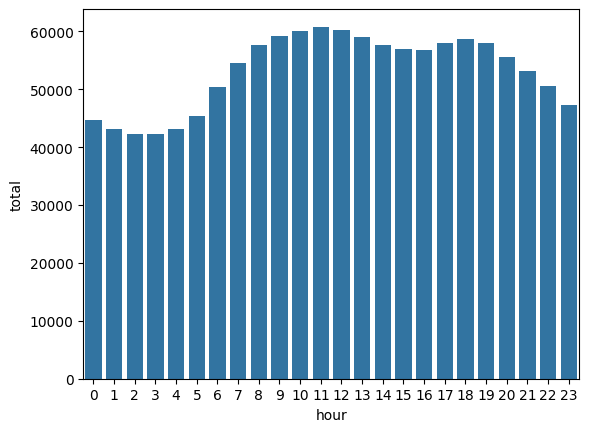

In [5]:
sns.barplot(aggregated_df, x = 'hour', y = 'total')

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Reshape the 'total' column to a 2D array
total_reshaped = aggregated_df['total'].values.reshape(-1, 1)

# Fit and transform the 'total' column
aggregated_df['normalized'] = scaler.fit_transform(total_reshaped)


<Axes: xlabel='hour', ylabel='normalized'>

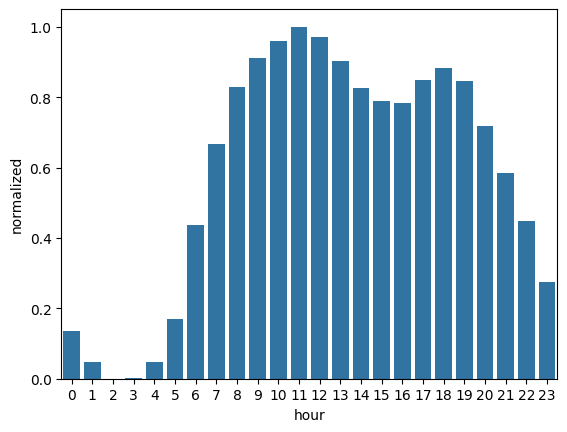

In [7]:
sns.barplot(aggregated_df, x = 'hour', y = 'normalized')

In [8]:
aggregated_df.to_csv('../data/prepared_consumption2024.csv', index=False)